In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from analysis.utils.graph_analysis import *
import cmath

In [29]:
# from bispectrumcode.python.scrappystuff.bispectrum import *
from bispectrumcode.python.scrappystuff.bispectrum_tricky import *
from PIL import Image

In [28]:
sns.set_style('dark')
matplotlib.rcParams['figure.figsize'] = 10, 10

In [39]:
calvin_raw  = 1.0*np.asarray(Image.open('bispectrumcode/python/calvin_sml.png'))[:,:,0]
calvin = np.ones((500,500)) * 255
calvin[205:295, 200:300] = calvin_raw

In [40]:
C = np.fft.fft2(calvin_raw, calvin_raw.shape)
Cimag = np.imag(C)
Creal = np.real(C)
Cabs = np.abs(C)
Cphase = C/Cabs
calvin_phase = np.fft.ifft2(Cphase)
calvin_amp = np.fft.ifft2(Cabs)

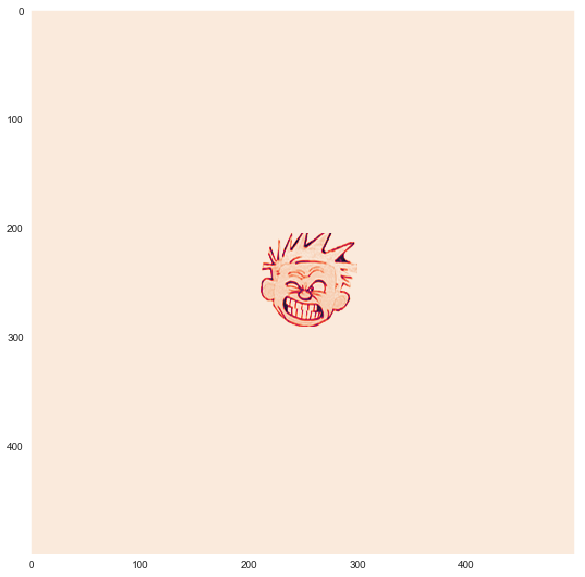

In [41]:
plt.imshow(calvin)

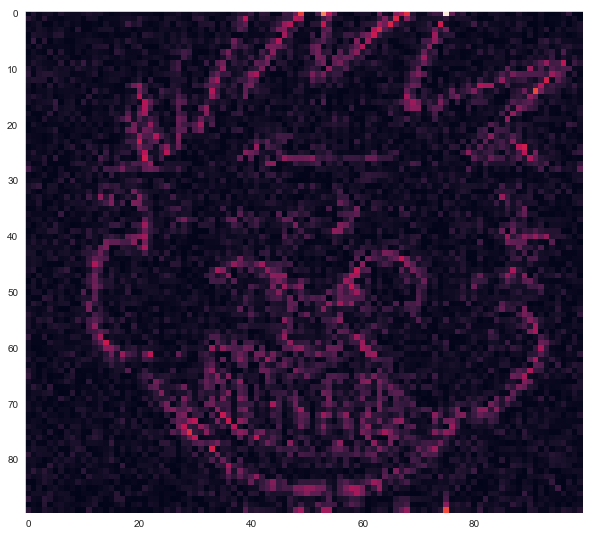

In [42]:
plt.imshow(np.abs(calvin_phase))

In [43]:
calvin_translate_1 = translate_img(calvin, 100, 100)
calvin_translate_2 = translate_img(calvin, 400, 100)

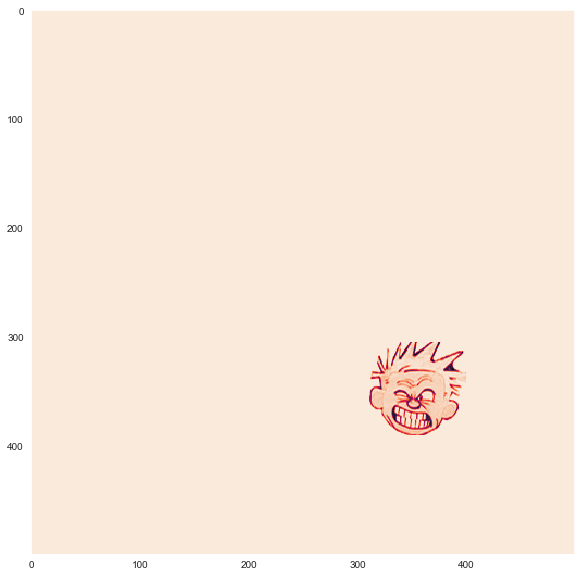

In [44]:
plt.imshow(calvin_translate_1)

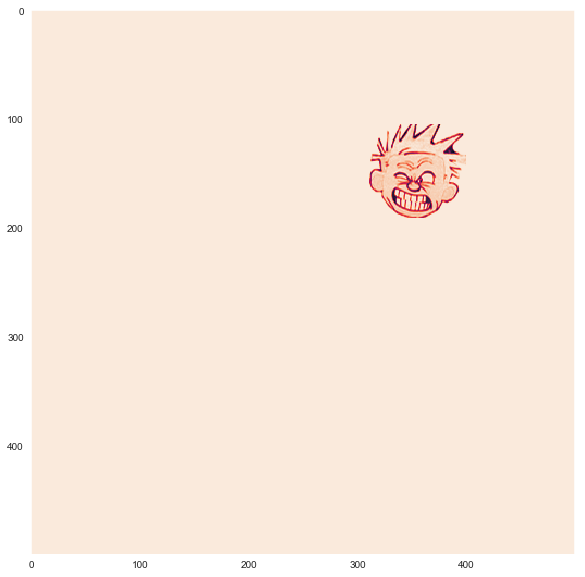

In [45]:
plt.imshow(calvin_translate_2)

In [53]:
calvin_fourier = np.fft.fft2(calvin, calvin.shape)
bs = bispectrum(calvin_fourier, truncated=True)

In [79]:
ibs = inv_bispectrum(bs)

IndexError: tuple index out of range

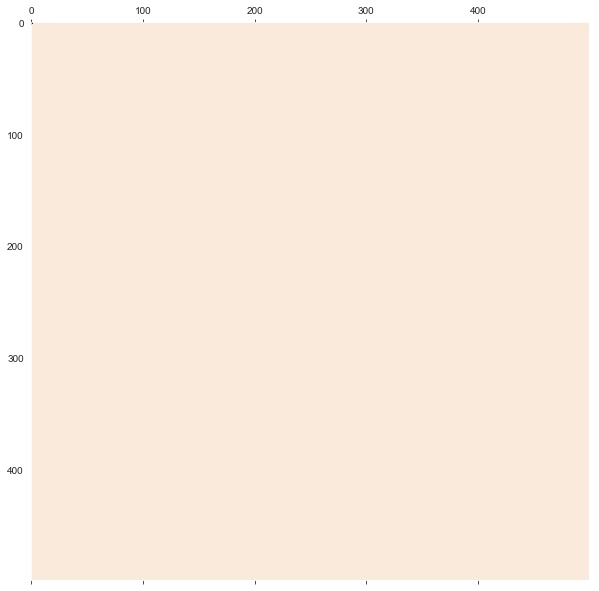

In [76]:
plt.matshow(bs)

In [ ]:
"""
Calvin and Hobbes power spectrum example:
Swap phase of Calvin (keep his FFT amplitudes) with phase of Hobbes (you should see a "Hobbes")
to show power spectrum is super not a complete set of invariants
Chris Hillar, Feb 2013
"""

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


im_size = (90,100)
calvin = 1.0*np.asarray(Image.open('calvin_sml.png'))[:,:,0]
hobbes = 1.0*np.asarray(Image.open('hobbes_sml.png'))[:,:,0]

C = np.fft.fft2(calvin,calvin.shape)
Cimag = np.imag(C)
Creal = np.real(C)
Cabs = np.abs(C)
Cphase = C/Cabs

H = np.fft.fft2(hobbes,hobbes.shape)
Himag = np.imag(H)
Hreal = np.real(H)
Habs = np.abs(H)
Hphase = H/Habs

CAmp_HPhs = Cabs*Hphase 
camp_hphs = np.fft.ifft2(Cabs*Hphase)

plt.figure(1)
plt.imshow(np.abs(camp_hphs),interpolation='nearest',cmap=plt.cm.gray)
plt.title('Calvin amplitudes, Hobbes phase')

CAmp_CPhs = Habs*Cphase 
camp_cphs = np.fft.ifft2(Cabs*Cphase)
plt.figure(2)
plt.imshow(np.abs(camp_cphs),interpolation='nearest',cmap=plt.cm.gray)
plt.title('Calvin amplitudes, Calvin phase')

plt.figure(4)
plt.imshow(hobbes,interpolation='nearest',cmap=plt.cm.gray)
plt.title('Hobbes image')

power_diff = np.abs(np.fft.fft2(camp_hphs,hobbes.shape))**2 - np.abs(np.fft.fft2(camp_cphs))**2
plt.figure(3)
plt.imshow(np.abs(power_diff),interpolation='nearest',cmap=plt.cm.gray)
plt.title('Power spectrum diff btwn images')